# Bài toán binary classification: cat, non-cat
https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e
dataset: test_catvnoncat.h5 + train_catvnoncat.h5


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

class NeuralNetworkBasicBinaryClassification:
    def __init__(self):
        self.train_set_x_orig = np.zeros(0)
        self.train_set_y = np.zeros(0)
        self.test_set_x_orig = np.zeros(0)
        self.test_set_y = np.zeros(0)
        self.classes = np.zeros(0)
        #
        self.train_set_x_standardize = np.zeros(0)
        self.test_set_x_standardize = np.zeros(0)
        
    
    def load_dataset(self):
        # Make sure train_catvnoncat.h5 & test_catvnoncat.h5 in the same folder
        train_dataset = h5py.File('train_catvnoncat.h5', "r")
        train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
        train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

        test_dataset = h5py.File('test_catvnoncat.h5', "r")
        test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
        test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

        classes = np.array(test_dataset["list_classes"][:]) # the list of classes

        train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
        test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
        
        #copy to global-variables
        self.train_set_x_orig = train_set_x_orig.copy()
        self.train_set_y = train_set_y_orig.copy()
        self.test_set_x_orig = test_set_x_orig.copy()
        self.test_set_y = test_set_y_orig.copy()
        self.classes = classes.copy()
        
        #Reshape the images to a flat vector of shape (height x width x 3, 1)
        train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
        test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
        self.train_set_x_standardize = train_set_x_flatten / 255
        self.test_set_x_standardize = test_set_x_flatten / 255
        
        return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    
    def show_test_image(self, imageIdx):
        plt.imshow(self.train_set_x_orig[imageIdx])
        print(classes[np.squeeze(train_set_y[:,imageIdx])].decode('utf-8'))
        
    # __sigmoid       
    def __sigmoid(self, z):
        s = 1 / (1 + np.exp(-z))    
        return s
    
    def initialize_with_zeros(self, dim):
        w = np.zeros(shape=(dim, 1))
        b = 0
        return w, b
    
    
    
    #Forward propagation
    def __Forward_propagation(self, w, b, X, Y):
        m = X.shape[1]
        # X là ma trận (n x m)
        # self.w là ma trận ( n x 1) --> chuyển vị thành (1 x n) nhân cho X
        # output là ma trận (1 x n) @ (n x m) --> (1 x m)
        
        # step 1: hidden layer
        z_h = np.dot(w.T, X) + b
        
        # step 2: activation of hidden layer
        a_h = self.__sigmoid(z_h)
        
        
        
        #step 3:cost function: Loss Cross-Entropy
        cost = (-1/m) * np.sum(Y * np.log(a_h) + (1-Y) * (np.log(1-a_h)))
        #cost = 0
        return cost, 
    
        
    # Backward propagation
    def __Backward_propagation(self, w, b, X, Y):
        m = X.shape[1]
        
        # step 1: net input of hidden layer
        z_h = np.dot(w.T, X) + b
        
        # step 2: activation of hidden layer
        a_h = self.__sigmoid(z_h)
        
        # step 2: activation of hidden layer
        dw = (1/m) * np.dot(X, (a_h - Y).T) #???
        db = (1/m) * np.sum(a_h - Y)     #???
        
        grads = {'dw': dw, 'db': db}
        return grads
    
    
    def propagate(self, w, b, X, Y):    
        cost = self.__Forward_propagation(w, b, X, Y)
        grads = self.__Backward_propagation(w, b, X, Y)
        return cost, grads
    
    
    
    def optimize(self, w, b, X, Y, num_iterations, learning_rate, print_cost=False):
        costs=[]
    
        for i in range(num_iterations):

            #Cost and gradient calculation
            cost, grads = self.propagate(w, b, X, Y)

            #Get derivatives
            dw = grads['dw']
            db = grads['db']

            #Update rule
            w = w - learning_rate * dw
            b = b - learning_rate * db

            #Record costs
            if i % 100 == 0:
                costs.append(cost)

            #Print cost every 100 training examples
            if print_cost and i % 100 == 0:
                print('Cost after iteration %i: %f' % (i, cost))

        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}
    
        return params, grads, costs
    
    
    def predict(self, w, b, X):
         # X là ma trận (n x m)
        # self.w là ma trận ( n x 1) --> chuyển vị thành (1 x n) nhân cho X
        # output là ma trận (1 x n) @ (n x m) --> (1 x m)        
        m = X.shape[1]
        Y_prediction = np.zeros((1, m))
        
        w = w.reshape(X.shape[0], 1)
        
         # step 1: net input of hidden layer
        z_h = np.dot(w.T, X) + b
        
        # step 2: activation of hidden layer
        a_h = self.__sigmoid(z_h)        
        
        #Assign to Y_prediction        
        for i in range(a_h.shape[1]):
            Y_prediction[0, i] = 1 if a_h[0, i] > 0.5 else 0

        return Y_prediction

    
    def model(self, X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
        #Initialize parameters with 0s   
        w, b = self.initialize_with_zeros(X_train.shape[0])

        #Gradient descent
        parameters, grads, costs = self.optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

        #Retrive parameters w, b from dictionary
        w = parameters['w']
        b = parameters['b']

        #Predict test/train set examples
        Y_prediction_test = self.predict(w, b, X_test)
        Y_prediction_train = self.predict(w, b, X_train)

        #Print test/train errors
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

        d = {'costs': costs,
             'Y_prediction_test': Y_prediction_test,
             'Y_prediction_train': Y_prediction_train,
             'w': w,
             'b': b,
             'learning_rate': learning_rate,
             'num_iterations': num_iterations}

        return d

In [45]:
my_neuralNetwork = NeuralNetworkBasicBinaryClassification()

#load and print some information
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = my_neuralNetwork.load_dataset()

print('--------------------------------')
print('train_set_x_orig.shape = {}'.format(train_set_x_orig.shape))
print('train_set_y.shape = {}'.format(train_set_y.shape))
print('--------------------------------')
print('test_set_x_orig = {}'.format(test_set_x_orig.shape))
print('test_set_y = {}'.format(test_set_y.shape))
print('classes = {}'.format(classes))
print('--------------------------------')

#---------------------------------------------------
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
print('Number of train images = {}'.format(m_train))
print('Number of test = {}'.format(m_test))
print('heigt/width of each image = {}'.format(num_px))

--------------------------------
train_set_x_orig.shape = (209, 64, 64, 3)
train_set_y.shape = (1, 209)
--------------------------------
test_set_x_orig = (50, 64, 64, 3)
test_set_y = (1, 50)
classes = [b'non-cat' b'cat']
--------------------------------
Number of train images = 209
Number of test = 50
heigt/width of each image = 64


# show test the train-image by index


cat


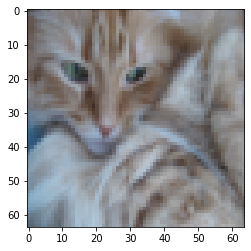

In [46]:
my_neuralNetwork.show_test_image(2)

In [47]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
cost, grads = my_neuralNetwork.propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

print('-------------------------------------------------')
params, grads, costs = my_neuralNetwork.optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205
-------------------------------------------------
w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [48]:
train_set_x = my_neuralNetwork.train_set_x_standardize
train_set_y = my_neuralNetwork.train_set_y

test_set_x = my_neuralNetwork.test_set_x_standardize
test_set_y = my_neuralNetwork.test_set_y

print('train_set_x shape {}'.format(train_set_x.shape))
print('train_set_x shape {}'.format(test_set_x.shape))

print('train_set_y shape {}'.format(train_set_y.shape))
print('test_set_y shape {}'.format(test_set_y.shape))
d = my_neuralNetwork.model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train_set_x shape (12288, 209)
train_set_x shape (12288, 50)
train_set_y shape (1, 209)
test_set_y shape (1, 50)
Here
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Here
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219

0.0

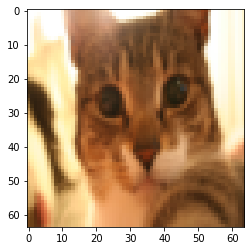

In [50]:
d = my_neuralNetwork.model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10000, learning_rate = 0.005, print_cost = True)

#Check if previously wrong prediction is now right
plt.imshow(test_set_x[:,11].reshape((num_px, num_px, 3)))
d['Y_prediction_test'][0][11]

1.0

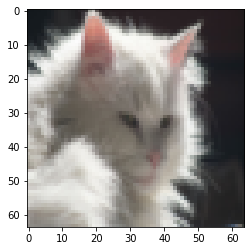

In [58]:
plt.imshow(test_set_x[:,8].reshape((num_px, num_px, 3)))
d['Y_prediction_test'][0][8]

#  2-layer Neural Network
Loss Function: MSE
train_set_x  (12288, 209)
train_set_x  (12288, 50)
train_set_y  (1, 209)
test_set_y  (1, 50)
layer_2: 4 node
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

class NeuralNetwork2Layer:
    def __init__(self):
        self.train_set_x_orig = np.zeros(0)
        self.train_set_y = np.zeros(0)
        self.test_set_x_orig = np.zeros(0)
        self.test_set_y = np.zeros(0)
        self.classes = np.zeros(0)
        #
        self.train_set_x_standardize = np.zeros(0)
        self.test_set_x_standardize = np.zeros(0)
        
        #
        self.hidden_layer_nodes = 4
        self.output_layer_nodes = 1
    
    def load_dataset(self):
        # Make sure train_catvnoncat.h5 & test_catvnoncat.h5 in the same folder
        train_dataset = h5py.File('train_catvnoncat.h5', "r")
        train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
        train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

        test_dataset = h5py.File('test_catvnoncat.h5', "r")
        test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
        test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

        classes = np.array(test_dataset["list_classes"][:]) # the list of classes

        train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
        test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
        
        #copy to global-variables
        self.train_set_x_orig = train_set_x_orig.copy()
        self.train_set_y = train_set_y_orig.copy()
        self.test_set_x_orig = test_set_x_orig.copy()
        self.test_set_y = test_set_y_orig.copy()
        self.classes = classes.copy()
        
        #Reshape the images to a flat vector of shape (height x width x 3, 1)
        train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
        test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
        self.train_set_x_standardize = train_set_x_flatten / 255
        self.test_set_x_standardize = test_set_x_flatten / 255
        
        return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    
    def show_test_image(self, imageIdx):
        plt.imshow(self.train_set_x_orig[imageIdx])
        print(classes[np.squeeze(train_set_y[:,imageIdx])].decode('utf-8'))
        
    # __sigmoid       
    def __sigmoid(self, z):
        s = 1 / (1 + np.exp(-z))    
        return s
    
    #dim: số row của X (n x m) --> n
    def initialize_with_zeros(self, dim):
        weigher1 = np.zeros(shape=(dim, self.hidden_layer_nodes))
        bias1 = 0
        #
        weigher2 = np.zeros(shape=(self.hidden_layer_nodes, 1))
        bias2 = 0
        return weigher1, bias1, weigher2, bias2
    
    
    
    #Forward propagation
    def __Forward_propagation(self, weigher1, bias1, weigher2, bias2, X, Y):
        m = X.shape[1]
        # X là ma trận (n x m)
        # self.w là ma trận ( n x 1) --> chuyển vị thành (1 x n) nhân cho X
        # output là ma trận (1 x n) @ (n x m) --> (1 x m)
        
        # step 1: calculate of hidden layer
        z_hidden_layer = (np.dot(weigher1.T, X) + bias1)
        a_hidden_layer = self.__sigmoid(z_hidden_layer)        
        
        print('z_hidden_layer.shape = {}'.format(z_hidden_layer.shape))
        print('a_hidden_layer.shape = {}'.format(a_hidden_layer.shape))
        
        # step 2: calculate of output layer
        z_output = (np.dot(weigher2.T, a_hidden_layer) + bias2)       
        a_output = self.__sigmoid(z_output)        
        
        
        #step 3:cost function: Loss Cross-Entropy
        cost = (-1/m) * np.sum(Y * np.log(a_output) + (1-Y) * (np.log(1-a_output)))
        #cost = ((np.sum((a_output - Y) ** 2)) * 0.5) / N
        
        
        print('z_output.shape = {}'.format(z_output.shape))
        print('a_output.shape = {}'.format(a_output.shape))
        
        #z_hidden_layer.shape = (4, 209)
        #a_hidden_layer.shape = (4, 209)
        #z_output.shape = (1, 209)
        #a_output.shape = (1, 209)
        
        
        return z_hidden_layer, a_hidden_layer, z_output, a_output, cost
    
    def sigmoid_derivative(self, a) :
        return (a * (1. - a)) 
    # Backward propagation
    def __Backward_propagationA(self, weigher1, bias1, weigher2, bias2, X, Y):
        m = X.shape[1]
        
        z_hidden_layer, a_hidden_layer, z_output, a_output, _ = self.__Forward_propagation(weigher1, bias1, weigher2, bias2, X, Y)
        
        
        # [n_samples, n_classlabels]
        sigma_out = a_output - Y        
        sigmoid_derivative_h = a_hidden_layer * (1. - a_hidden_layer)
        
       
        # -> [n_samples, n_hidden]
        print('sigma_out.shape = {}'.format(sigma_out.shape))
        print('weigher2.shape = {}'.format(weigher2.shape))
        print('sigmoid_derivative_h.shape = {}'.format(sigmoid_derivative_h.shape))
        print('X.shape = {}'.format(X.shape))
        
        #sigma_out.shape = (1, 209)
        #weigher2.shape = (4, 1)
        #sigmoid_derivative_h.shape = (4, 209)
        #X.shape = (12288, 209)

        sigma_h = (np.dot(sigma_out, weigher2.T) * sigmoid_derivative_h)
        
        grad_w_h = np.dot(X.T, sigma_h)
        grad_b_h = np.sum(sigma_h, axis=0)

        # [n_hidden, n_samples] dot [n_samples, n_classlabels]
        # -> [n_hidden, n_classlabels]
        grad_w_out = np.dot(sigma_out, a_output.T)
        grad_b_out = np.sum(sigma_out, axis=0)

        
        grads = {'dw_hidden': grad_w_h, 'db_hidden': grad_b_h, 'dw_out': grad_w_out, 'db_out': grad_b_out}
        return grads
    
    # Backward propagation
    def __Backward_propagation(self, weigher1, bias1, weigher2, bias2, X, Y):
        m = X.shape[1]
        
        z_hidden_layer, a_hidden_layer, z_output, a_output, _ = self.__Forward_propagation(weigher1, bias1, weigher2, bias2, X, Y)
        
        #shapes (1,209) and (1,4) not aligned: 209 (dim 1) != 1 (dim 0)
        d_weights2 = np.dot(z_output.T, (2*(Y - a_output) * self.sigmoid_derivative(a_output)))
        
        print('z_hidden_layer.T.shape = {}'.format(z_hidden_layer.T.shape)) #209 x 4
        bb = 2*(Y - a_output) * self.sigmoid_derivative(a_output)
        print('bb.shape = {}'.format(bb.shape)) #1 x 209 # (4x1)
        aa = np.dot(2*(Y - a_output) * self.sigmoid_derivative(a_output), weigher2.T)
        #print('z_hidden_layer.T.shape = {}'.format(z_hidden_layer.T.shape)) #209 x 4
        d_weights1 = np.dot(z_hidden_layer.T,  (np.dot(2*(Y - a_output) * self.sigmoid_derivative(a_output), weigher2.T) * sigmoid_derivative(a_hidden_layer)))

        
        grads = {'dw_hidden': d_weights1, 'db_hidden': bias1, 'dw_out': d_weights2, 'db_out': bias2}
        return grads
    
    
    def propagate(self, weigher1, bias1, weigher2, bias2, X, Y):    
        cost = self.__Forward_propagation(weigher1, bias1, weigher2, bias2, X, Y)
        grads = self.__Backward_propagation(weigher1, bias1, weigher2, bias2, X, Y)
        return cost, grads
    
    
    
    def optimize(self, weigher1, bias1, weigher2, bias2, X, Y, num_iterations, learning_rate, print_cost=False):
        costs=[]
    
        for i in range(num_iterations):

            #Cost and gradient calculation
            cost, grads = self.propagate(weigher1, bias1, weigher2, bias2, X, Y)

            #Get derivatives
            dw_hidden = grads['dw_hidden']
            db_hidden = grads['db_hidden']
            
            dw_out = grads['dw_out']
            db_out = grads['db_out']
            
            #Update rule
            weigher1 = weigher1 - learning_rate * dw_hidden
            bias1 = bias1 - learning_rate * db_hidden

            weigher2 = weigher2 - learning_rate * dw_out
            bias2 = bias2 - learning_rate * db_out          
            #Record costs
            if i % 100 == 0:
                costs.append(cost)

            #Print cost every 100 training examples
            if print_cost and i % 100 == 0:
                print('Cost after iteration %i: %f' % (i, cost))

        params = {'weigher1': weigher1, 'bias1': bias1, 'weigher2': weigher2, 'bias2': bias2}
        grads = {'dw_hidden': dw_hidden, 'db_hidden': db_hidden, 'dw_out': dw_out, 'db_out': db_out}
    
        return params, grads, costs
    
    
    def predict(self, weigher1, bias1, weigher2, bias2, X):
         # X là ma trận (n x m)
        # self.w là ma trận ( n x 1) --> chuyển vị thành (1 x n) nhân cho X
        # output là ma trận (1 x n) @ (n x m) --> (1 x m)        
        m = X.shape[1]
        Y_prediction = np.zeros((1, m))            
        
        # step 1: calculate of hidden layer
        z_hidden_layer = (np.dot(weigher1.T, X) + bias1)
        a_hidden_layer = self.__sigmoid(z_hidden_layer)        
        
        # step 2: calculate of output layer
        z_output = (np.dot(weigher2.T, a_hidden_layer) + bias2)       
        a_output = self.__sigmoid(z_output)
        
        
        #Assign to Y_prediction        
        for i in range(a_output.shape[1]):
            Y_prediction[0, i] = 1 if a_output[0, i] > 0.5 else 0

        return Y_prediction

    
    def model(self, X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
        #Initialize parameters with 0s   
        weigher1, bias1, weigher2, bias2 = self.initialize_with_zeros(X_train.shape[0])
        
        print('weigher1 {}'.format(weigher1.shape)) #sigma_out (1, 209)
        print('weigher2 {}'.format(weigher2.shape))   #weigher2 (4, 1)
        print('X {}'.format(X_train.shape))                 #X (12288, 209)
        
        
        #Gradient descent
        parameters, grads, costs = self.optimize(weigher1, bias1,  
                                                 weigher2, bias2,
                                                 X_train, 
                                                 Y_train, 
                                                 num_iterations, 
                                                 learning_rate, 
                                                 print_cost)

        #Retrive parameters w, b from dictionary
        weigher1 = parameters['weigher1']
        bias1 = parameters['bias1']

        weigher2 = parameters['weigher2']
        bias2 = parameters['bias2']
        
        #Predict test/train set examples
        Y_prediction_test = self.predict(weigher1, bias1, weigher2, bias2, X_test)
        Y_prediction_train = self.predict(weigher1, bias1, weigher2, bias2, X_train)

        #Print test/train errors
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

        d = {'costs': costs,
             'Y_prediction_test': Y_prediction_test,
             'Y_prediction_train': Y_prediction_train,
             'w': w,
             'b': b,
             'learning_rate': learning_rate,
             'num_iterations': num_iterations}

        return d

In [43]:
my_neuralNetwork2 = NeuralNetwork2Layer()

#load and print some information
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = my_neuralNetwork2.load_dataset()

print('--------------------------------')
print('train_set_x_orig.shape = {}'.format(train_set_x_orig.shape))
print('train_set_y.shape = {}'.format(train_set_y.shape))
print('--------------------------------')
print('test_set_x_orig = {}'.format(test_set_x_orig.shape))
print('test_set_y = {}'.format(test_set_y.shape))
print('classes = {}'.format(classes))
print('--------------------------------')

#---------------------------------------------------
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
print('Number of train images = {}'.format(m_train))
print('Number of test = {}'.format(m_test))
print('heigt/width of each image = {}'.format(num_px))

--------------------------------
train_set_x_orig.shape = (209, 64, 64, 3)
train_set_y.shape = (1, 209)
--------------------------------
test_set_x_orig = (50, 64, 64, 3)
test_set_y = (1, 50)
classes = [b'non-cat' b'cat']
--------------------------------
Number of train images = 209
Number of test = 50
heigt/width of each image = 64


In [44]:
train_set_x = my_neuralNetwork2.train_set_x_standardize.T
train_set_y = my_neuralNetwork2.train_set_y.T

test_set_x = my_neuralNetwork2.test_set_x_standardize.T
test_set_y = my_neuralNetwork2.test_set_y.T

d = my_neuralNetwork2.model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

weigher1 (209, 4)
weigher2 (4, 1)
X (209, 12288)
z_hidden_layer.shape = (4, 12288)
a_hidden_layer.shape = (4, 12288)
z_output.shape = (1, 12288)
a_output.shape = (1, 12288)
z_hidden_layer.shape = (4, 12288)
a_hidden_layer.shape = (4, 12288)
z_output.shape = (1, 12288)
a_output.shape = (1, 12288)


ValueError: shapes (12288,1) and (209,12288) not aligned: 1 (dim 1) != 209 (dim 0)

In [41]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tuesday Oct 2, 2018
@author: Madhuri Suthar, PhD Candidate in Electrical and Computer Engineering, UCLA
"""

# Imports
import numpy as np 
      
# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)
#X.shape = (4, 3)
#y.shape = (4, 1)
X, y = train_set_x.T, train_set_y.T
#X.shape = (12288, 209)
#y.shape = (1, 209)

print('X.shape = {}'.format(X.shape))
print('y.shape = {}'.format(y.shape))
#
# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np. zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))
    
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        

NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
  
    NN.train(X, y)

X.shape = (209, 12288)
y.shape = (209, 1)
for iteration # 0

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


for iteration # 200

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]


for iteration # 400

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]


for iteration # 600

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]


for iteration # 800

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]


for iteration # 1000

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]

for iteration # 1200

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]

for iteration # 1400

Input : 
[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
Actual Output: 
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]